In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Tue Nov 14 20:27:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Provide your credentials to the runtime
from google.colab import drive
drive.mount('/content/drive')

from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Mounted at /content/drive
Authenticated


In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/revisions_natcomms/data/researcher_grid_distribution.csv', delimiter=';')
data.head()

,grid_id,organization_name,author_counts
0,grid.38142.3c,Harvard University,91304
1,grid.410726.6,University of Chinese Academy of Sciences,65702
2,grid.11899.38,Universidade de São Paulo,59142
3,grid.17063.33,University of Toronto,51815
4,grid.13402.34,Zhejiang University,50451


In [4]:
summary = data['author_counts'].describe()
summary

count    63232.000000
mean       282.261893
std       1600.220324
min          1.000000
25%          3.000000
50%         14.000000
75%         83.000000
max      91304.000000
Name: author_counts, dtype: float64

In [5]:
percentiles = data['author_counts'].quantile([0.75, 0.9, 0.95, 0.99])
percentiles

0.75      83.00
0.90     389.00
0.95     977.00
0.99    5430.38
Name: author_counts, dtype: float64

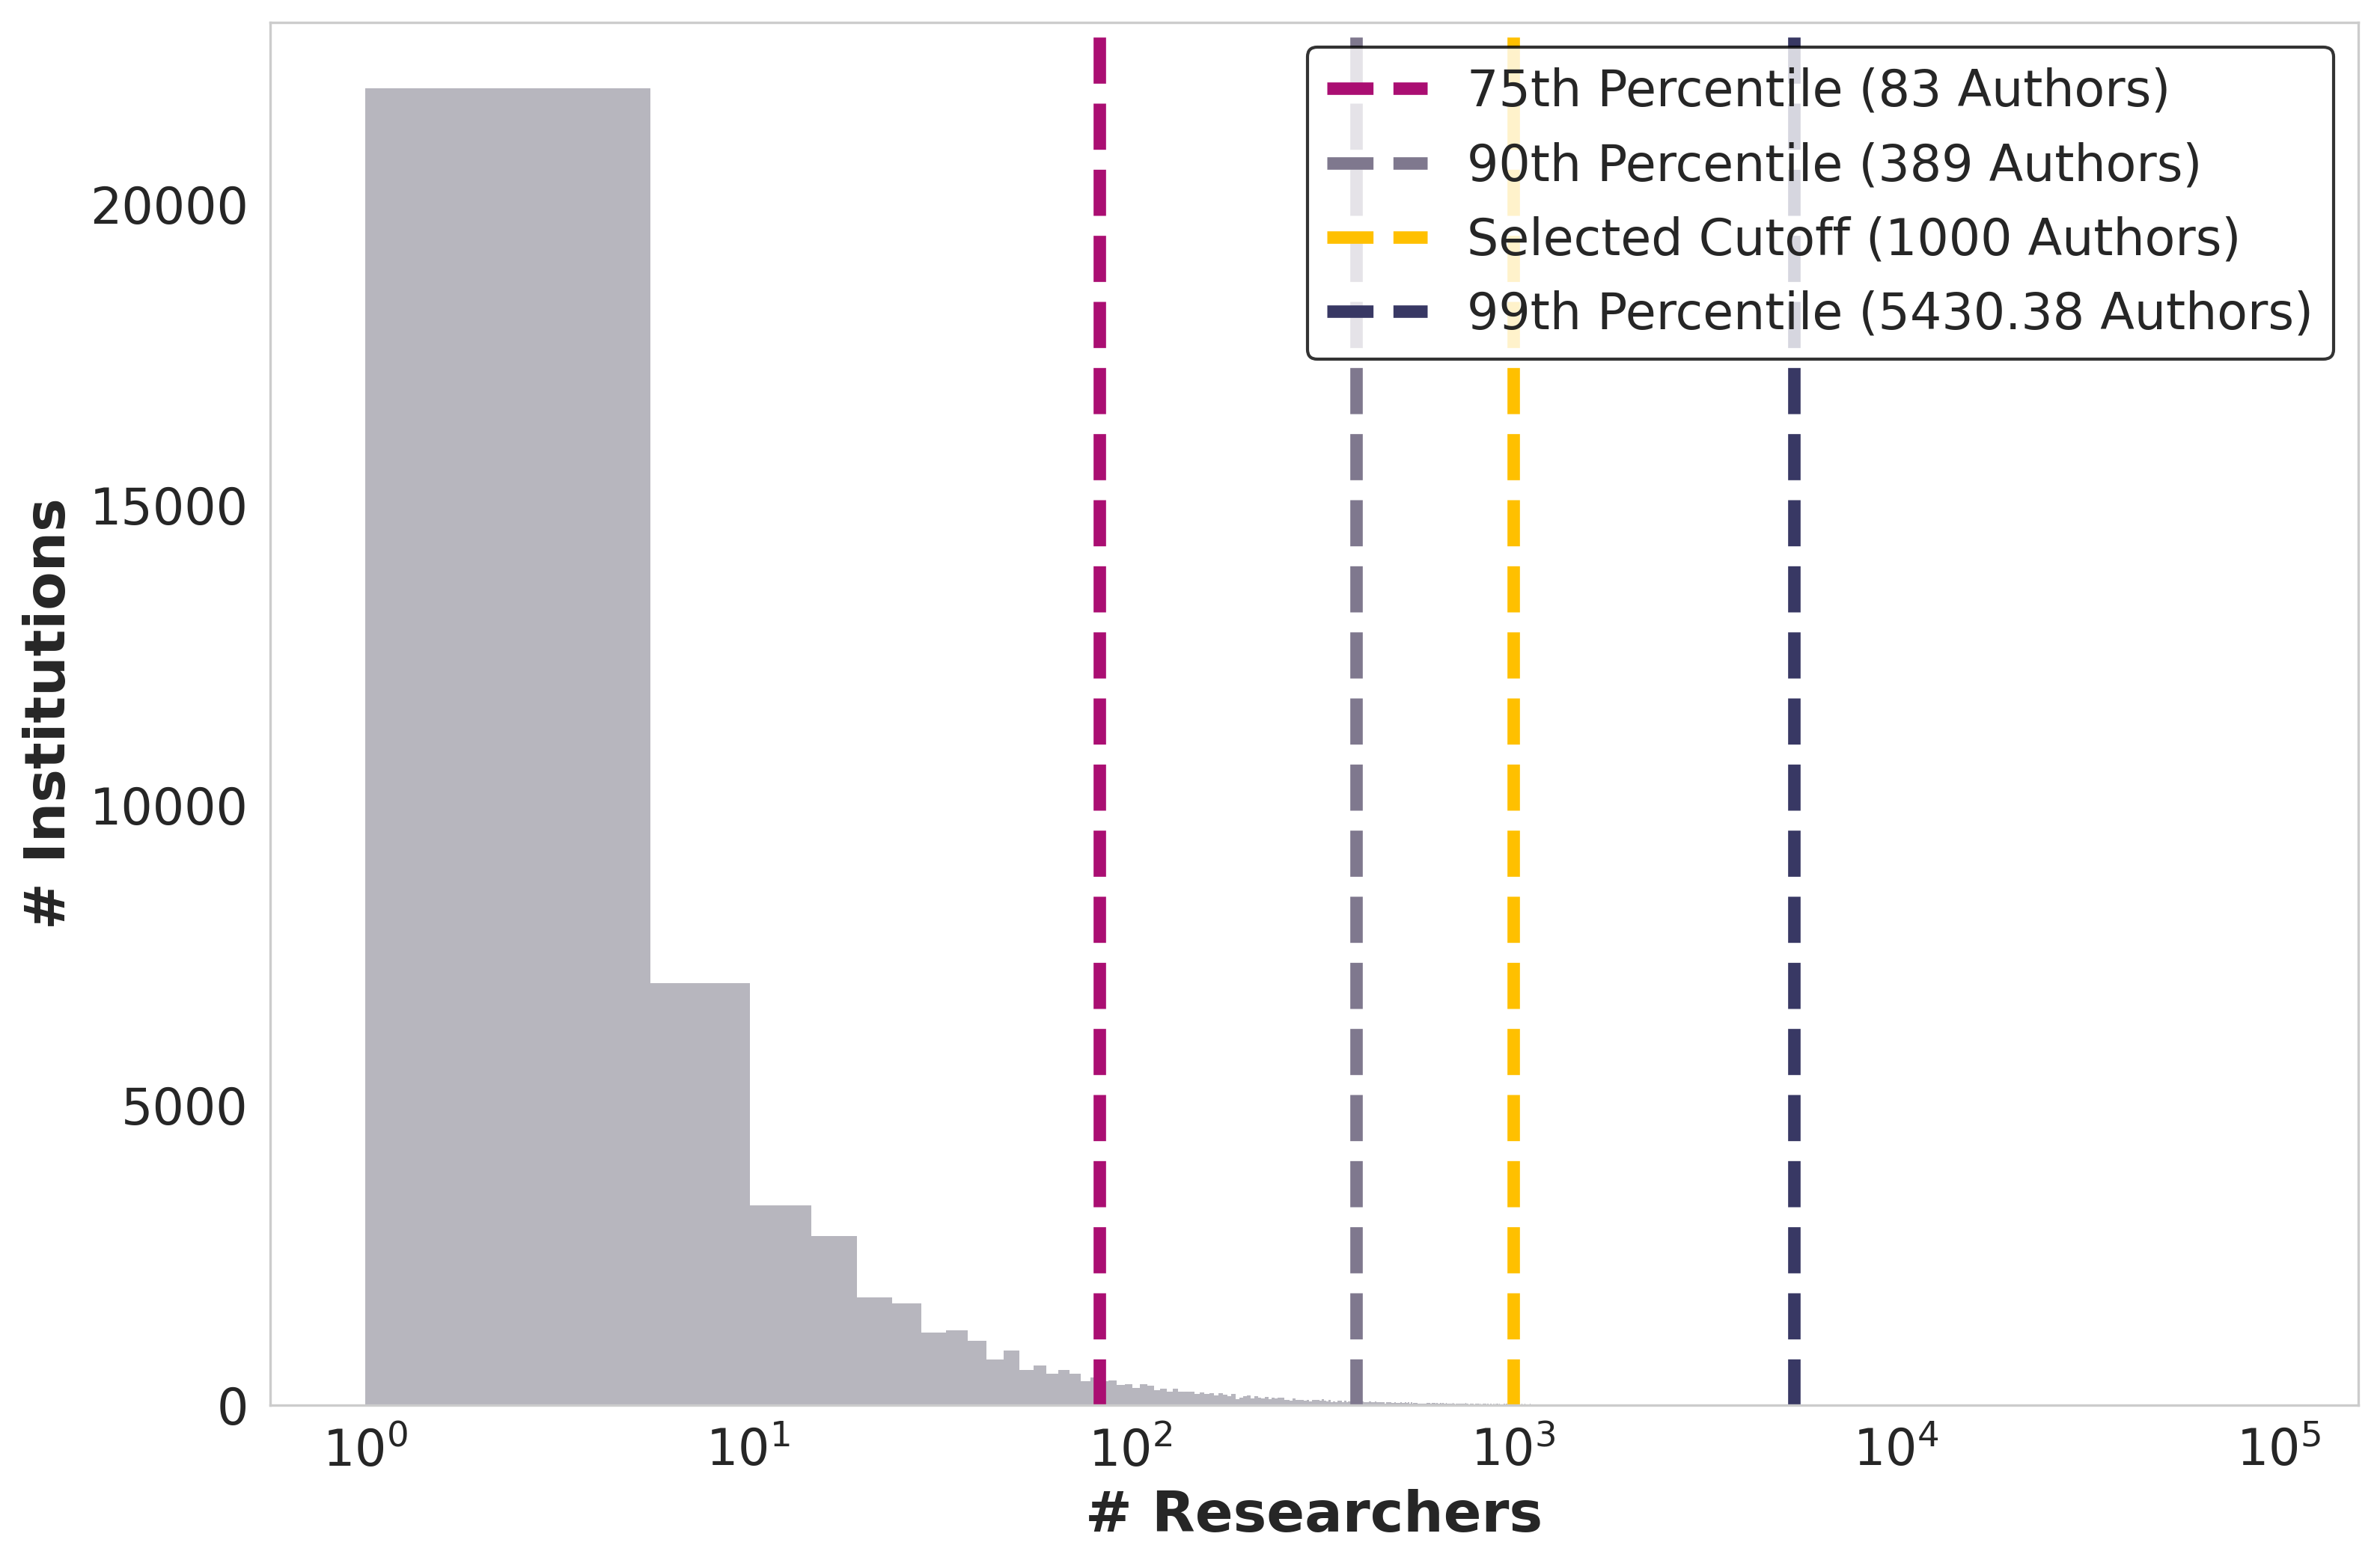

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['axes.labelweight'] = 'bold'
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16

color_palette = ["#9F9EA8", "#AA0E72", "#7F788E", "#FFC000", "#383864", "#70AD47"]


sns.set_style("whitegrid", {'axes.grid': False})

plt.figure(figsize=(12, 8), dpi=300)

sns.histplot(data['author_counts'], bins=20000, kde=False, color=color_palette[0], edgecolor="white")


plt.axvline(percentiles.loc[0.75], color=color_palette[1], linestyle='--', linewidth=4, label='75th Percentile (83 Authors)')
plt.axvline(percentiles.loc[0.90], color=color_palette[2], linestyle='--', linewidth=4, label='90th Percentile (389 Authors)')
plt.axvline(1000, color=color_palette[3], linestyle='--', linewidth=4, label='Selected Cutoff (1000 Authors)')
plt.axvline(percentiles.loc[0.99], color=color_palette[4], linestyle='--', linewidth=4, label='99th Percentile (5430.38 Authors)')

plt.xlabel('# Researchers', fontsize=18, weight='bold')
plt.ylabel('# Institutions', fontsize=18, weight='bold')
plt.legend(loc='upper right', fontsize=16, edgecolor='black')
plt.xscale('log')
plt.show()

In [7]:
num_institutions_below_cutoff = (data['author_counts'] < 1000).sum()
num_institutions_above_cutoff = (data['author_counts'] >= 1000).sum()
num_institutions_below_cutoff, num_institutions_above_cutoff

(60127, 3105)

In [8]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/revisions_natcomms/data/researcher_types_distribution.csv', delimiter=';')
data.head()

,grid_id,organization_name,country_code,country,latitude,longitude,native_count,newcomer_count,outgoer_count,total_researcher_count,native_percentage,newcomer_percentage,outgoer_percentage,organization_type_id,organization_type
0,grid.411368.9,Amirkabir University of Technology,IR,Iran,35.7043,51.4097,5067,1081,2186,6148,82.417,17.583,35.556,3.0,Education
1,grid.411622.2,University of Mazandaran,IR,Iran,36.6996,52.6461,897,350,370,1247,71.933,28.067,29.671,3.0,Education
2,grid.412105.3,Kerman University of Medical Sciences,IR,Iran,30.2839,57.0321,1211,509,360,1720,70.407,29.593,20.930,3.0,Education
3,grid.412831.d,University of Tabriz,IR,Iran,38.0636,46.3286,2778,730,983,3508,79.190,20.810,28.022,3.0,Education
4,grid.472472.0,"Islamic Azad University, Science and Research ...",IR,Iran,35.7826,51.3172,2782,1578,1185,4360,63.807,36.193,27.179,3.0,Education


In [9]:
descriptive_stats = data.describe()
descriptive_stats

,latitude,longitude,native_count,newcomer_count,outgoer_count,total_researcher_count,native_percentage,newcomer_percentage,outgoer_percentage,organization_type_id
count,3041.000000,3041.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3042.000000
mean,34.465595,24.773156,2538.225435,1835.290831,913.610582,4373.516267,57.862634,42.137460,20.137819,3.887245
std,20.193367,78.934743,3516.965952,2863.126286,1319.930183,5928.145122,17.804292,17.804288,6.303619,1.340479
min,-45.864900,-157.818000,155.000000,111.000000,100.000000,1000.000000,9.404000,4.961000,4.369000,1.000000
25%,31.228100,-17.463300,804.000000,560.500000,266.000000,1438.500000,44.414500,27.611500,15.821000,3.000000
50%,39.100600,12.465800,1335.000000,938.000000,463.000000,2304.000000,59.979000,40.021000,19.959000,3.000000
75%,46.073600,112.443000,2782.000000,1882.000000,954.000000,4557.000000,72.389500,55.586000,23.904000,5.000000
max,69.680100,175.618000,41420.000000,56069.000000,17649.000000,91304.000000,95.039000,90.596000,46.544000,8.000000


In [10]:
grouped_by_country = data.groupby('country').mean()
grouped_by_org_type = data.groupby('organization_type').mean()

<ipython-input-10-b320cf3f4bdf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_by_country = data.groupby('country').mean()
<ipython-input-10-b320cf3f4bdf>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_by_org_type = data.groupby('organization_type').mean()


In [11]:
grouped_by_org_type

,latitude,longitude,native_count,newcomer_count,outgoer_count,total_researcher_count,native_percentage,newcomer_percentage,outgoer_percentage,organization_type_id
organization_type,,,,,,,,,,
Archive,48.261600,9.423234,824.000000,820.000000,405.666667,1644.000000,49.491000,50.509000,23.883333,1.0
Company,43.154029,-3.840546,1429.265306,1100.265306,345.734694,2529.530612,57.162571,42.837490,14.355020,2.0
Education,32.283566,30.195971,3350.897916,2023.563870,1136.460716,5374.461785,64.780474,35.219620,19.883511,3.0
Facility,37.845569,36.146137,1157.248252,1009.895105,483.055944,2167.143357,54.085696,45.914402,23.295164,4.0
Government,37.132836,10.558923,1663.171429,2935.200000,845.809524,4598.371429,40.814000,59.186095,18.345362,5.0
Healthcare,37.903720,10.268084,1232.007519,1586.189474,576.276692,2818.196992,44.322779,55.677316,20.420137,6.0
Nonprofit,35.255392,3.683247,959.153846,1530.807692,434.788462,2489.961538,41.608481,58.391635,17.893442,7.0
Other,37.806091,41.573968,609.545455,916.909091,244.636364,1526.454545,45.630727,54.369273,17.271636,8.0


In [12]:
grouped_by_country

,latitude,longitude,native_count,newcomer_count,outgoer_count,total_researcher_count,native_percentage,newcomer_percentage,outgoer_percentage,organization_type_id
country,,,,,,,,,,
Algeria,36.643167,5.840527,1175.666667,208.333333,263.000000,1384.000000,85.256333,14.743667,19.031333,3.000000
Argentina,-34.448782,-60.526227,2050.000000,1677.363636,1031.000000,3727.363636,62.668273,37.331727,29.602636,3.727273
Australia,-33.451951,145.134667,2215.869565,2352.420290,913.347826,4568.289855,45.899783,54.100319,19.898507,4.449275
Austria,47.800700,15.040700,2178.176471,1854.058824,844.294118,4032.235294,54.136000,45.864118,20.004706,3.352941
Bangladesh,24.010700,90.107233,1346.166667,520.833333,505.166667,1867.000000,72.398000,27.602000,25.674333,3.166667
...,...,...,...,...,...,...,...,...,...,...
United States,38.404763,-89.245767,2776.256075,3097.721495,1166.050467,5873.977570,45.186525,54.813583,18.440574,4.042991
Uruguay,-34.902600,-56.176500,2781.000000,826.000000,757.000000,3607.000000,77.100000,22.900000,20.987000,3.000000
Venezuela,10.490900,-66.892000,844.000000,308.000000,329.000000,1152.000000,73.264000,26.736000,28.559000,3.000000


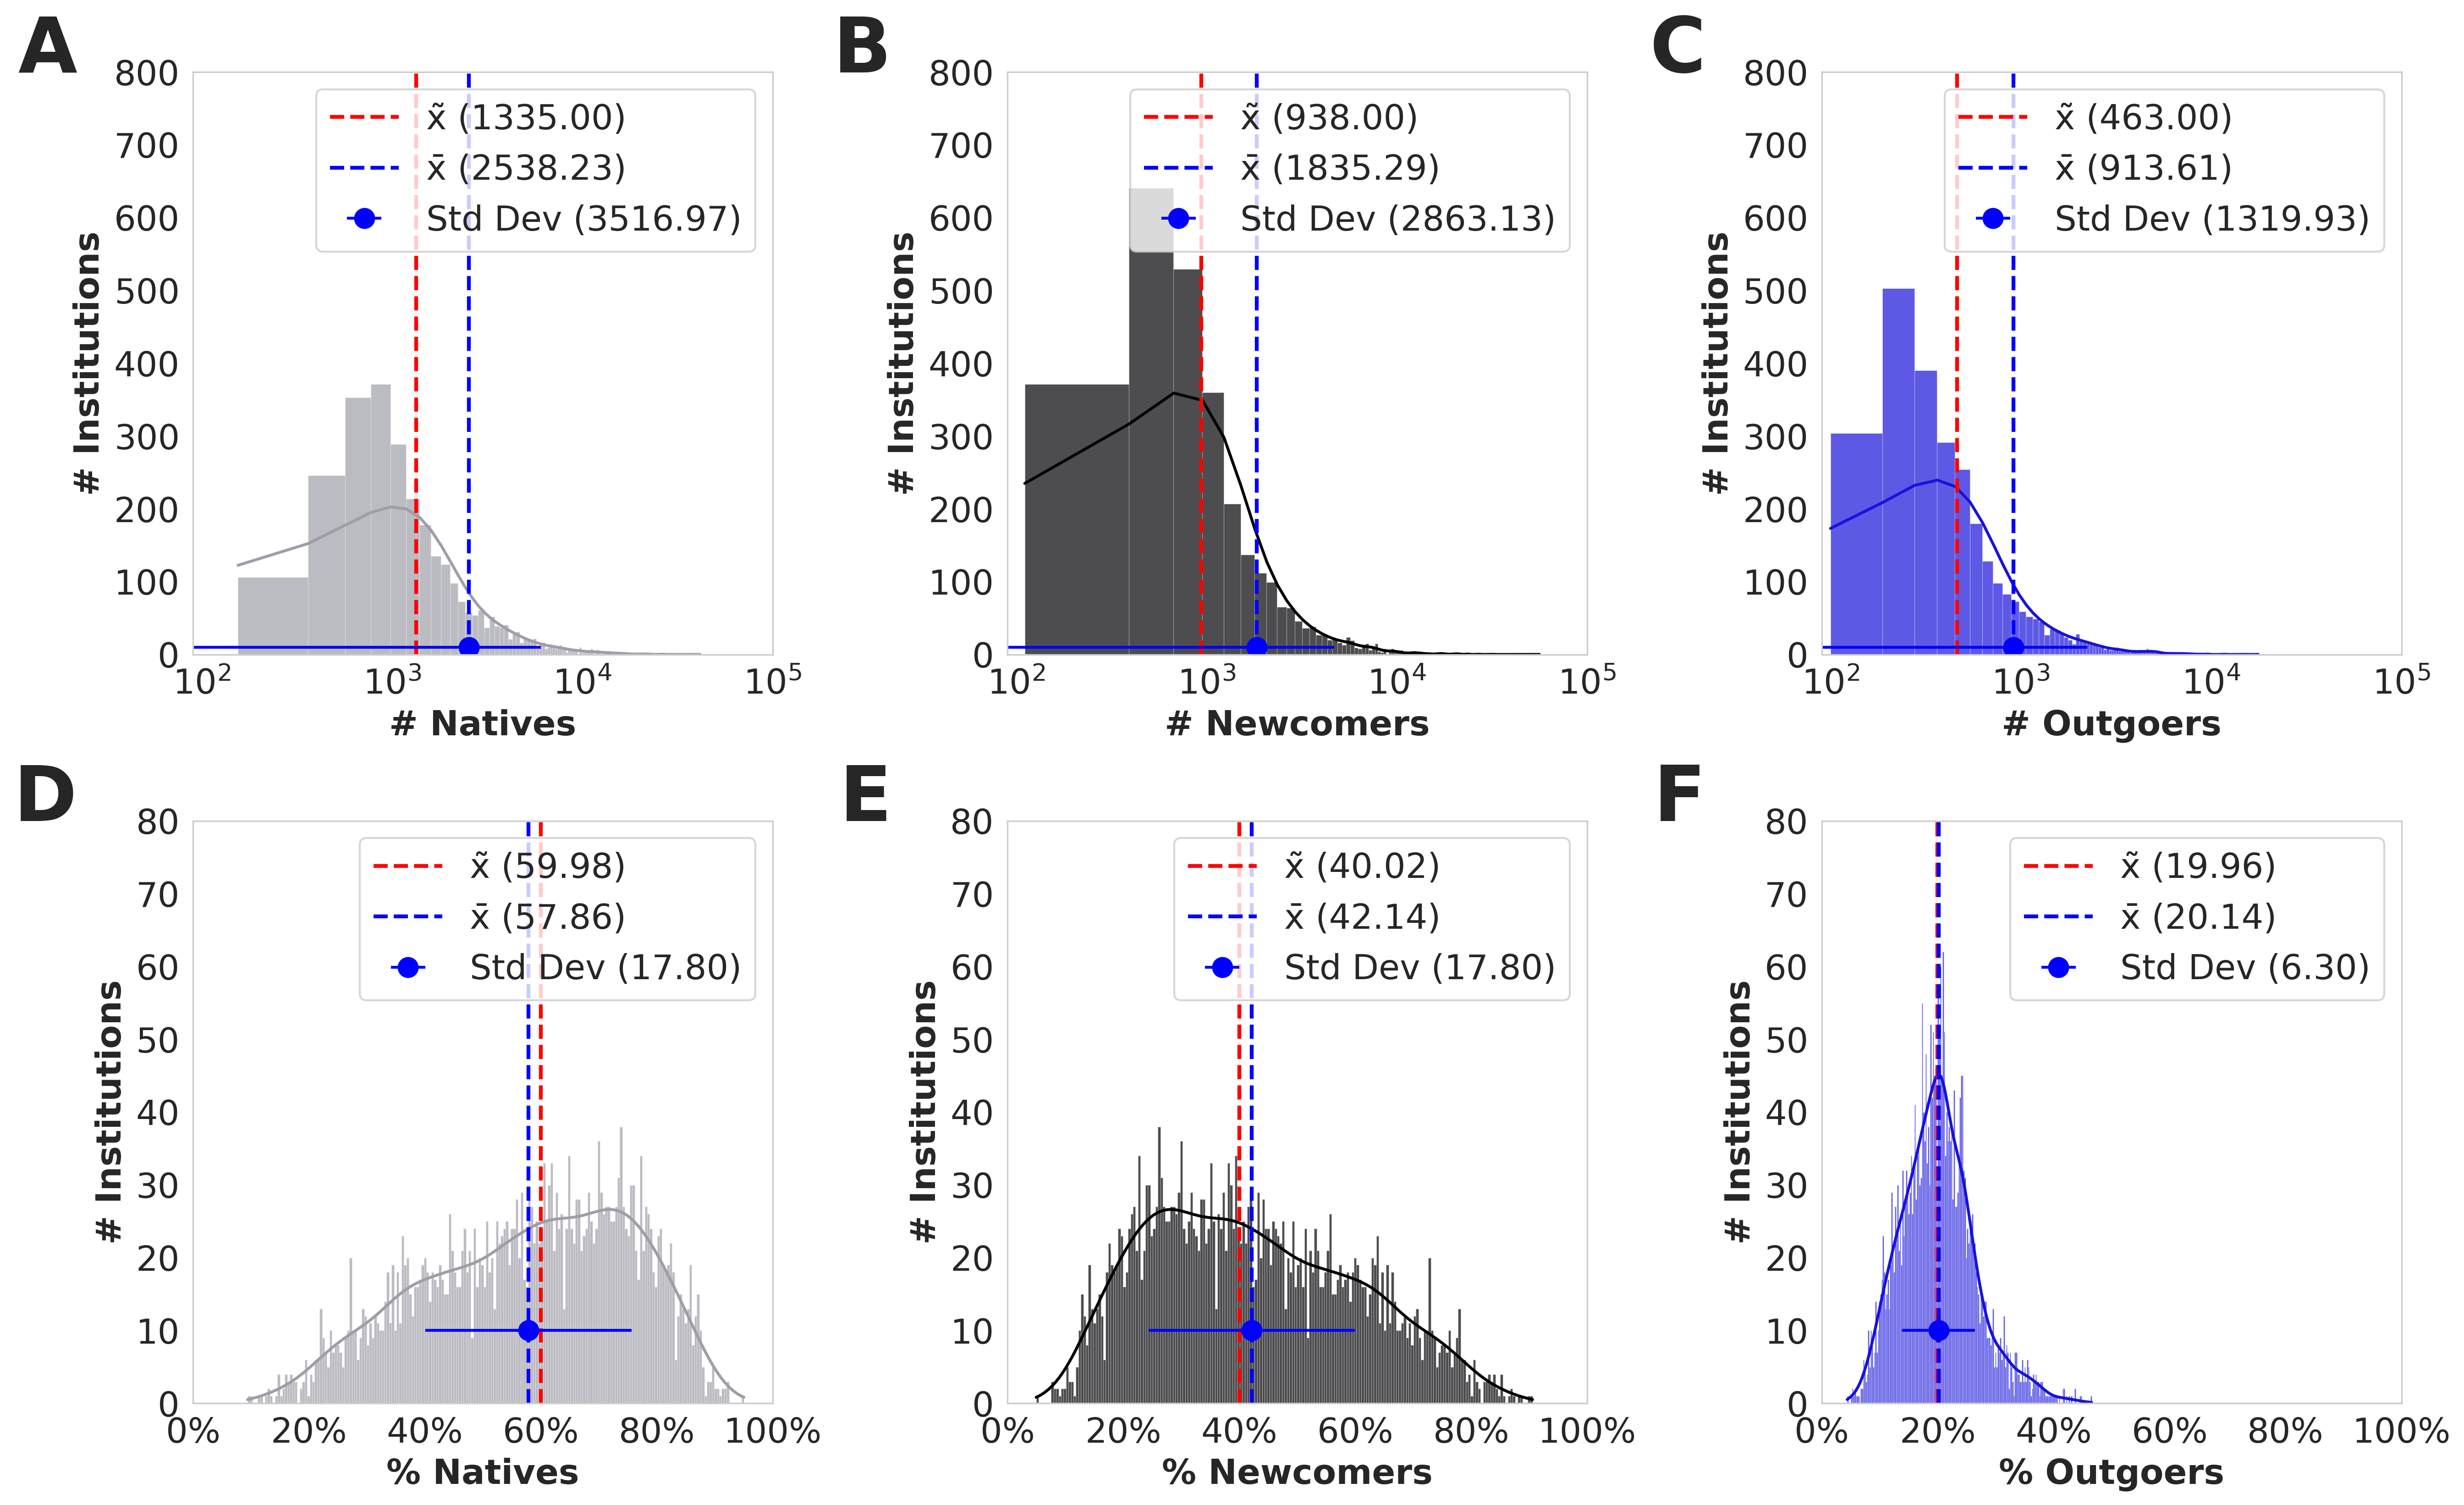

In [13]:
from matplotlib.ticker import FuncFormatter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['axes.labelweight'] = 'bold'
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18

color_palette = ["#9F9EA8", "#010104", "#1812DB", "#9F9EA8", "#010104", "#1812DB"]

sns.set_style("whitegrid", {'axes.grid': False, 'grid.linestyle': '--'})

numeric_columns = ['native_count', 'newcomer_count', 'outgoer_count',
                   'native_percentage', 'newcomer_percentage', 'outgoer_percentage']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

fig, axes = plt.subplots(2, 3, figsize=(18, 12), dpi=300)

subplot_labels = ['A', 'B', 'C', 'D', 'E', 'F']
subplot_xaxis_labels = ['# Natives', '# Newcomers', '# Outgoers', '% Natives', '% Newcomers', '% Outgoers']

bins = 200

def to_percent(x, pos):
    return f'{x:.0f}%'

percent_formatter = FuncFormatter(to_percent)

for i in range(3, 6):
    ax = axes[i // 3, i % 3]
    ax.xaxis.set_major_formatter(percent_formatter)

for i, column in enumerate(numeric_columns):
    ax = axes[i // 3, i % 3]
    bars = sns.histplot(data[column], kde=True, bins=bins, color=color_palette[i % len(color_palette)], edgecolor="white", ax=ax)

    for patch in bars.patches:
        patch.set_alpha(0.7)

    ax.set_xlabel(subplot_xaxis_labels[i], fontsize=18, weight='bold')
    ax.set_ylabel('# Institutions', fontsize=18, weight='bold')
    ax.text(-0.2, 1.1, subplot_labels[i], transform=ax.transAxes, fontsize=40, fontweight='bold', va='top', ha='right')

    if i < 3:
        ax.set_xscale('log')
        ax.set_xlim(left=90, right=1e5)
        ax.set_ylim(0, 800)
    else:
        ax.set_xlim(0, 100)
        ax.set_ylim(0, 80)

    if i >= 3:
        xlabel = f"{column.replace('_', ' ').title()} (%)"
    else:
        xlabel = column.replace('_', ' ').title()

    median_value = data[column].median()
    mean_value = data[column].mean()
    std_deviation = data[column].std()

    ax.axvline(median_value, color='red', linestyle='--', linewidth=2, label=f'x̃ ({median_value:.2f})')
    ax.axvline(mean_value, color='blue', linestyle='--', linewidth=2, label=f'x̄ ({mean_value:.2f})')

    ax.errorbar(x=[mean_value], y=[10], xerr=[std_deviation], fmt='o', color='blue', markersize=10, label=f'Std Dev ({std_deviation:.2f})')

    ax.legend(loc='upper right', fontsize=18)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
